In [1]:
import os
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
os.chdir(parent_directory)
print("Working directory:", os.getcwd())

Working directory: c:\Users\benjo\OneDrive\Data Science Masters\DSMP\dsmp-2024-group-19


In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import math
# import yfinance as yf # for proof of concept
from tools import *

c:\Users\benjo\anaconda3\envs\lipreadGPU\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


code adapted from: https://www.geeksforgeeks.org/time-series-forecasting-using-recurrent-neural-networks-rnn-in-tensorflow/

In [3]:
# # Proof of concept data
# start_date = dt.datetime(2020,4,1)
# end_date = dt.datetime(2023,4,1)
# data = yf.download("GOOGL", start=start_date, end=end_date)

In [4]:
data = read_merged_data()
data = pd.DataFrame(data[0])[:600]
# remove rows where last tapes price is nan
data = data.dropna(subset=["Last Tapes Price"])


Opening UoB_Set01_2025-01-02tapes.csv


c:\Users\benjo\OneDrive\Data Science Masters\DSMP\dsmp-2024-group-19\tools.py:218: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_bids_asks = df_bids_asks.applymap(lambda x: x[1:-1].replace(",","") if isinstance(x, str) else "")


In [5]:
print(data)

                                                    Incoming bid  \
combined_time                                                      
2025-01-02 08:00:10                              [193 15][267 5]   
2025-01-02 08:00:11                [118 10][267 3][96 10][46 10]   
2025-01-02 08:00:12                 [92 10][127 1][264 1][181 1]   
2025-01-02 08:00:13                                                
2025-01-02 08:00:14                                      [10 10]   
...                                                          ...   
2025-01-02 08:09:55  [258 4][91 16][260 2] [258 2][269 6][143 2]   
2025-01-02 08:09:56                               [112 16][43 2]   
2025-01-02 08:09:57     [269 5][91 2][180 6][48 2][256 6][225 6]   
2025-01-02 08:09:58                  [228 6][47 6][216 2][54 16]   
2025-01-02 08:09:59   [103 6][249 3][269 3][214 6][102 16][47 6]   

                                                          Incoming ask  \
combined_time                            

In [6]:
print(data.columns)

Index(['Incoming bid', 'Incoming ask', 'Outgoing bid', 'Outgoing ask', 'alpha',
       'beta', 'LOB', 'mid_price', 'low_ask', 'high_bid', 'Volume',
       'Tapes Price', 'Last Tapes Price'],
      dtype='object')


In [7]:
# Setting 80 percent data for training
training_data_len = math.ceil(len(data) * .8)
training_data_len 
 
#Splitting the dataset
train_data = data[:training_data_len]
test_data = data[training_data_len:]
print(len(train_data), len(test_data))

472 118


In [8]:
# # proof of concept data
# dataset_train = train_data.Open.values

In [9]:
dataset_train = train_data["Last Tapes Price"].values
print(dataset_train)

[267.         267.66666667 270.         267.         267.
 267.         267.         267.         265.         263.66666667
 263.66666667 264.         263.57142857 263.57142857 267.33333333
 267.33333333 261.66666667 270.         270.         270.
 270.         270.         270.         270.         270.
 270.         263.         260.2        259.2        259.2
 259.2        259.         259.         259.         257.
 257.         254.5        257.66666667 258.         258.
 266.         264.         263.33333333 263.33333333 263.
 263.         263.         263.         261.         261.
 259.         259.         259.         259.         259.
 260.         260.         260.         263.         263.
 263.         263.         256.         256.         256.
 254.71428571 254.71428571 262.75       263.         263.
 263.         263.         263.         267.         267.
 267.         267.         263.66666667 260.         260.
 255.33333333 257.5        257.5        264.         26

In [10]:
# Reshaping 1D to 2D array
dataset_train = np.reshape(dataset_train, (-1,1)) 
dataset_train.shape

(472, 1)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
# scaling dataset
scaled_train = scaler.fit_transform(dataset_train)
 
print(scaled_train[:5])

[[0.84615385]
 [0.88034188]
 [1.        ]
 [0.84615385]
 [0.84615385]]


In [12]:
# # proof of concept data

# # Selecting Open Price values
# dataset_test = test_data.Open.values
# # Reshaping 1D to 2D array
# dataset_test = np.reshape(dataset_test, (-1,1))  
# # Normalizing values between 0 and 1
# scaled_test = scaler.fit_transform(dataset_test)  
# print(*scaled_test[:5])

In [13]:
 # Selecting tapes Price values
dataset_test = test_data["Last Tapes Price"].values
# Reshaping 1D to 2D array
dataset_test = np.reshape(dataset_test, (-1,1))  
# Normalizing values between 0 and 1
scaled_test = scaler.fit_transform(dataset_test)  
print(*scaled_test[:5])

[1.] [1.] [0.70666667] [0.70666667] [0.70666667]


60 seconds predicting 1 second ahead

In [14]:
window = 60
X_train = []
y_train = []
for i in range(window, len(scaled_train)):
    X_train.append(scaled_train[i-window:i, 0])
    y_train.append(scaled_train[i, 0])
    if i <= (window+1):
        print(X_train)
        print(y_train)
        print()

[array([0.84615385, 0.88034188, 1.        , 0.84615385, 0.84615385,
       0.84615385, 0.84615385, 0.84615385, 0.74358974, 0.67521368,
       0.67521368, 0.69230769, 0.67032967, 0.67032967, 0.86324786,
       0.86324786, 0.57264957, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.64102564, 0.4974359 , 0.44615385, 0.44615385,
       0.44615385, 0.43589744, 0.43589744, 0.43589744, 0.33333333,
       0.33333333, 0.20512821, 0.36752137, 0.38461538, 0.38461538,
       0.79487179, 0.69230769, 0.65811966, 0.65811966, 0.64102564,
       0.64102564, 0.64102564, 0.64102564, 0.53846154, 0.53846154,
       0.43589744, 0.43589744, 0.43589744, 0.43589744, 0.43589744,
       0.48717949, 0.48717949, 0.48717949, 0.64102564, 0.64102564])]
[0.6410256410256423]

[array([0.84615385, 0.88034188, 1.        , 0.84615385, 0.84615385,
       0.84615385, 0.84615385, 0.84615385, 0.74358974, 0.67521368,
       0.67521368, 0.69230769, 0.670

In [15]:
X_test = []
y_test = []
for i in range(window, len(scaled_test)):
    X_test.append(scaled_test[i-window:i, 0])
    y_test.append(scaled_test[i, 0])

In [16]:
 
# The data is converted to Numpy array
X_train, y_train = np.array(X_train), np.array(y_train)
 
#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))
print("X_train :",X_train.shape,"y_train :",y_train.shape)

X_train : (412, 60, 1) y_train : (412, 1)


In [17]:
# The data is converted to numpy array
X_test, y_test = np.array(X_test), np.array(y_test)
 
#Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))
print("X_test :",X_test.shape,"y_test :",y_test.shape)

X_test : (58, 60, 1) y_test : (58, 1)


In [18]:
# importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import GRU, Bidirectional
from keras.optimizers import SGD
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [35]:
# initializing the RNN
regressor = Sequential()
 
# adding RNN layers and dropout regularization
regressor.add(SimpleRNN(units = window, 
                        activation = "tanh",
                        return_sequences = True,
                        input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))
 
regressor.add(SimpleRNN(units = window, 
                        activation = "tanh",
                        return_sequences = True))
 
regressor.add(SimpleRNN(units = window,
                        activation = "tanh",
                        return_sequences = True))
 
regressor.add( SimpleRNN(units = window))
 
# adding the output layer
regressor.add(Dense(units = 1,activation='sigmoid'))
 
# compiling RNN
regressor.compile(optimizer = SGD(learning_rate=0.01,
                                  decay=1e-6, 
                                  momentum=0.9, 
                                  nesterov=True), 
                  loss = "mean_squared_error")
 
# fitting the model
regressor.fit(X_train, y_train, epochs = 20, batch_size = 2)
regressor.summary()

Epoch 1/20
206/206 [==============================] - 67s 310ms/step - loss: 0.0407
Epoch 2/20
206/206 [==============================] - 64s 310ms/step - loss: 0.0364
Epoch 3/20
206/206 [==============================] - 61s 296ms/step - loss: 0.0291
Epoch 4/20
206/206 [==============================] - 61s 298ms/step - loss: 0.0274
Epoch 5/20
206/206 [==============================] - 62s 301ms/step - loss: 0.0220
Epoch 6/20
206/206 [==============================] - 60s 293ms/step - loss: 0.0205
Epoch 7/20
206/206 [==============================] - 63s 308ms/step - loss: 0.0188
Epoch 8/20
206/206 [==============================] - 62s 299ms/step - loss: 0.0166
Epoch 9/20
206/206 [==============================] - 61s 297ms/step - loss: 0.0169
Epoch 10/20
206/206 [==============================] - 63s 307ms/step - loss: 0.0155
Epoch 11/20
206/206 [==============================] - 60s 293ms/step - loss: 0.0154
Epoch 12/20
206/206 [==============================] - 61s 297ms/step - lo

In [19]:
#Initialising the model
regressorLSTM = Sequential()
 
#Adding LSTM layers
regressorLSTM.add(LSTM(window, 
                       return_sequences = True, 
                       input_shape = (X_train.shape[1],1)))
regressorLSTM.add(LSTM(window, 
                       return_sequences = False))
regressorLSTM.add(Dense(window/2))
 
#Adding the output layer
regressorLSTM.add(Dense(1))
 
#Compiling the model
regressorLSTM.compile(optimizer = 'adam',
                      loss = 'mean_squared_error',
                      metrics = ["accuracy"])
 
#Fitting the model
regressorLSTM.fit(X_train, 
                  y_train, 
                  batch_size = 1, 
                  epochs = 12)
regressorLSTM.summary()

Epoch 1/12
412/412 [==============================] - 17s 20ms/step - loss: 0.0346 - accuracy: 0.0121
Epoch 2/12
412/412 [==============================] - 9s 21ms/step - loss: 0.0231 - accuracy: 0.0121
Epoch 3/12
412/412 [==============================] - 9s 23ms/step - loss: 0.0166 - accuracy: 0.0121
Epoch 4/12
412/412 [==============================] - 9s 23ms/step - loss: 0.0138 - accuracy: 0.0121
Epoch 5/12
412/412 [==============================] - 10s 23ms/step - loss: 0.0140 - accuracy: 0.0121
Epoch 6/12
412/412 [==============================] - 9s 23ms/step - loss: 0.0140 - accuracy: 0.0097
Epoch 7/12
412/412 [==============================] - 10s 23ms/step - loss: 0.0136 - accuracy: 0.0121
Epoch 8/12
412/412 [==============================] - 9s 22ms/step - loss: 0.0140 - accuracy: 0.0121
Epoch 9/12
412/412 [==============================] - 9s 22ms/step - loss: 0.0141 - accuracy: 0.0121
Epoch 10/12
412/412 [==============================] - 9s 22ms/step - loss: 0.0134 - acc

In [30]:
#Initialising the model
regressorGRU = Sequential()
 
# GRU layers with Dropout regularisation
regressorGRU.add(GRU(units=window, 
                     return_sequences=True,
                     input_shape=(X_train.shape[1],1),
                     activation='tanh'))
regressorGRU.add(Dropout(0.2))
 
regressorGRU.add(GRU(units=window, 
                     return_sequences=True,
                     activation='tanh'))
 
regressorGRU.add(GRU(units=window, 
                     return_sequences=True,
                     activation='tanh'))
 
regressorGRU.add(GRU(units=window, 
                     activation='tanh'))
 
# The output layer
regressorGRU.add(Dense(units=1,
                       activation='relu'))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(learning_rate=0.01, 
                                   decay=1e-7, 
                                   momentum=0.9, 
                                   nesterov=False),
                     loss='mean_squared_error')
 
# Fitting the data
regressorGRU.fit(X_train,y_train,epochs=20,batch_size=1)
regressorGRU.summary()

Epoch 1/20
412/412 [==============================] - 20s 34ms/step - loss: 0.0535
Epoch 2/20
412/412 [==============================] - 14s 34ms/step - loss: 0.0345
Epoch 3/20
412/412 [==============================] - 14s 35ms/step - loss: 0.0332
Epoch 4/20
412/412 [==============================] - 13s 32ms/step - loss: 0.0295
Epoch 5/20
412/412 [==============================] - 13s 32ms/step - loss: 0.0290
Epoch 6/20
412/412 [==============================] - 14s 34ms/step - loss: 0.0255
Epoch 7/20
412/412 [==============================] - 15s 36ms/step - loss: 0.0231
Epoch 8/20
412/412 [==============================] - 14s 35ms/step - loss: 0.0235
Epoch 9/20
412/412 [==============================] - 15s 35ms/step - loss: 0.0226
Epoch 10/20
412/412 [==============================] - 15s 36ms/step - loss: 0.0207
Epoch 11/20
412/412 [==============================] - 15s 35ms/step - loss: 0.0191
Epoch 12/20
412/412 [==============================] - 14s 35ms/step - loss: 0.0194
E

In [18]:
 
# predictions with X_test data
y_RNN = regressor.predict(X_test)
y_LSTM = regressorLSTM.predict(X_test)
y_GRU = regressorGRU.predict(X_test)

2/2 [==============================] - 2s 29ms/step


In [19]:
# scaling back from 0-1 to original
y_RNN_O = scaler.inverse_transform(y_RNN) 
y_LSTM_O = scaler.inverse_transform(y_LSTM) 
y_GRU_O = scaler.inverse_transform(y_GRU)

2/2 [==============================] - 1s 46ms/step
Stationary Predicted Count: 9
Stationary Actual Count: 32
Stationary Correct Count: 4
Upwards Predicted Count: 21
Upwards Actual Count: 12
Upwards Correct Count: 4
Downwards Predicted Count: 27
Downwards Actual Count: 13
Downwards Correct Count: 5
0.22807017543859648


<AxesSubplot: xlabel='combined_time'>

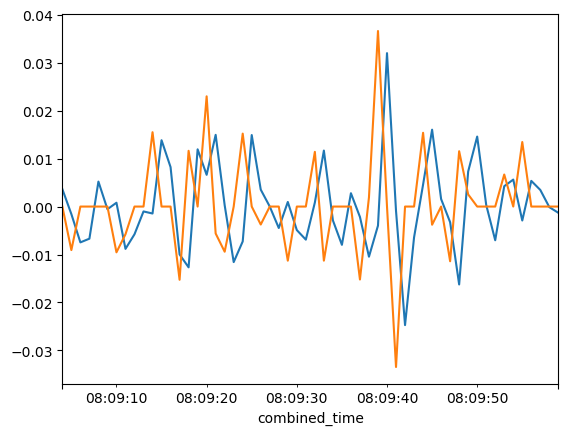

In [36]:
y_RNN = regressor.predict(X_test)
y_RNN_O = scaler.inverse_transform(y_RNN)

tapes_price = test_data["Last Tapes Price"]
actual_diff = tapes_price.pct_change().dropna()[window:]

pred = pd.DataFrame(y_RNN_O, index = test_data.index[window:], columns = ["Last Tapes Price"])
diff = pred["Last Tapes Price"].pct_change().dropna()

threshold = 0.001 # 0.1% trading fee threshold

# check if both are over 1/100 of a % increase
up_correct = (diff>threshold) & (actual_diff>threshold)
down_correct = (diff<-threshold) & (actual_diff<-threshold)
stationary_correct = ((diff<=threshold) & (diff>-threshold)) & ((actual_diff<=threshold) & (actual_diff>-threshold))

print(f"Stationary Predicted Count: {sum((diff<=threshold) & (diff>-threshold))}")
print(f"Stationary Actual Count: {sum(((actual_diff<=threshold) & (actual_diff>-threshold)))}")
print(f"Stationary Correct Count: {sum(stationary_correct)}")

#correct = diff_high*actual_diff > 0 # correct if direction is the same
#print(f"Stationary Predicted Count: {sum(diff_high== 0)}")
#print(f"Stationary Actual Count: {sum(actual_diff== 0)}")
# must also check if both are zero
#correct = correct | (diff_high == 0) & (actual_diff == 0)

correct = up_correct | down_correct | stationary_correct
print(f"Upwards Predicted Count: {sum(diff>threshold)}")
print(f"Upwards Actual Count: {sum(actual_diff>threshold)}")
print(f"Upwards Correct Count: {sum(up_correct)}")
print(f"Downwards Predicted Count: {sum(diff<-threshold)}")
print(f"Downwards Actual Count: {sum(actual_diff<-threshold)}")
print(f"Downwards Correct Count: {sum(down_correct)}")
print(correct.sum()/len(correct))

diff[1:100].plot()  
actual_diff[1:100].plot()

2/2 [==============================] - 0s 21ms/step
Stationary Predicted Count: 16
Stationary Actual Count: 32
Stationary Correct Count: 7
Upwards Predicted Count: 20
Upwards Actual Count: 12
Upwards Correct Count: 3
Downwards Predicted Count: 21
Downwards Actual Count: 13
Downwards Correct Count: 1
0.19298245614035087


<AxesSubplot: xlabel='combined_time'>

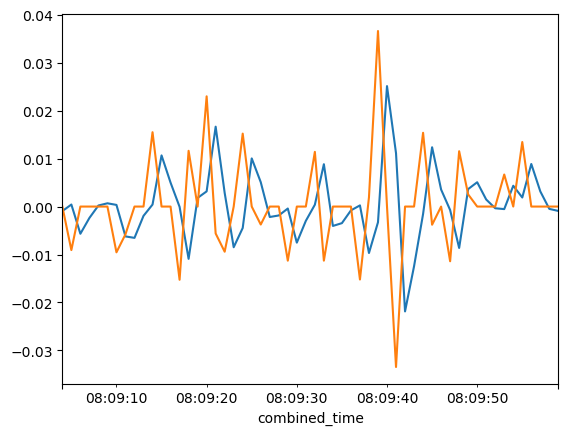

In [32]:
y_GRU = regressorGRU.predict(X_test)
y_GRU_O = scaler.inverse_transform(y_GRU)

tapes_price = test_data["Last Tapes Price"]
actual_diff = tapes_price.pct_change().dropna()[window:]

pred = pd.DataFrame(y_GRU_O, index = test_data.index[window:], columns = ["Last Tapes Price"])
diff = pred["Last Tapes Price"].pct_change().dropna()

threshold = 0.001 # 0.1% trading fee threshold

# check if both are over 1/100 of a % increase
up_correct = (diff>threshold) & (actual_diff>threshold)
down_correct = (diff<-threshold) & (actual_diff<-threshold)
stationary_correct = ((diff<=threshold) & (diff>-threshold)) & ((actual_diff<=threshold) & (actual_diff>-threshold))

print(f"Stationary Predicted Count: {sum((diff<=threshold) & (diff>-threshold))}")
print(f"Stationary Actual Count: {sum(((actual_diff<=threshold) & (actual_diff>-threshold)))}")
print(f"Stationary Correct Count: {sum(stationary_correct)}")

#correct = diff_high*actual_diff > 0 # correct if direction is the same
#print(f"Stationary Predicted Count: {sum(diff_high== 0)}")
#print(f"Stationary Actual Count: {sum(actual_diff== 0)}")
# must also check if both are zero
#correct = correct | (diff_high == 0) & (actual_diff == 0)

correct = up_correct | down_correct | stationary_correct
print(f"Upwards Predicted Count: {sum(diff>threshold)}")
print(f"Upwards Actual Count: {sum(actual_diff>threshold)}")
print(f"Upwards Correct Count: {sum(up_correct)}")
print(f"Downwards Predicted Count: {sum(diff<-threshold)}")
print(f"Downwards Actual Count: {sum(actual_diff<-threshold)}")
print(f"Downwards Correct Count: {sum(down_correct)}")
print(correct.sum()/len(correct))

diff[1:100].plot()  
actual_diff[1:100].plot()

2/2 [==============================] - 0s 13ms/step
Stationary Predicted Count: 24
Stationary Actual Count: 32
Stationary Correct Count: 12
Upwards Predicted Count: 17
Upwards Actual Count: 12
Upwards Correct Count: 3
Downwards Predicted Count: 16
Downwards Actual Count: 13
Downwards Correct Count: 4
0.3333333333333333


<AxesSubplot: xlabel='combined_time'>

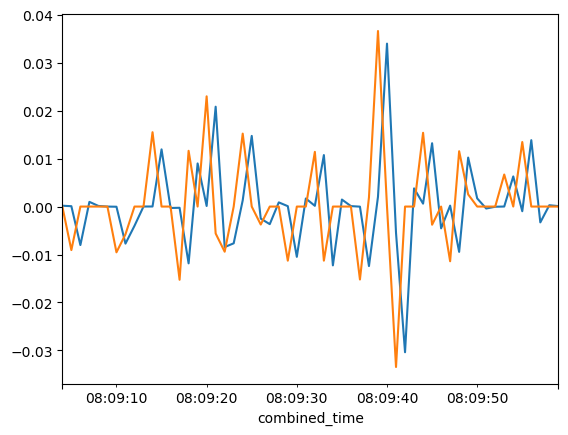

In [29]:
y_LSTM = regressorLSTM.predict(X_test)
y_LSTM_O = scaler.inverse_transform(y_LSTM) 

tapes_price = test_data["Last Tapes Price"]
actual_diff = tapes_price.pct_change().dropna()[window:]

pred = pd.DataFrame(y_LSTM_O, index = test_data.index[window:], columns = ["Last Tapes Price"])
diff = pred["Last Tapes Price"].pct_change().dropna()

threshold = 0.001 # 0.1% trading fee threshold

# check if both are over 1/100 of a % increase
up_correct = (diff>threshold) & (actual_diff>threshold)
down_correct = (diff<-threshold) & (actual_diff<-threshold)
stationary_correct = ((diff<=threshold) & (diff>-threshold)) & ((actual_diff<=threshold) & (actual_diff>-threshold))

print(f"Stationary Predicted Count: {sum((diff<=threshold) & (diff>-threshold))}")
print(f"Stationary Actual Count: {sum(((actual_diff<=threshold) & (actual_diff>-threshold)))}")
print(f"Stationary Correct Count: {sum(stationary_correct)}")

#correct = diff_high*actual_diff > 0 # correct if direction is the same
#print(f"Stationary Predicted Count: {sum(diff_high== 0)}")
#print(f"Stationary Actual Count: {sum(actual_diff== 0)}")
# must also check if both are zero
#correct = correct | (diff_high == 0) & (actual_diff == 0)

correct = up_correct | down_correct | stationary_correct
print(f"Upwards Predicted Count: {sum(diff>threshold)}")
print(f"Upwards Actual Count: {sum(actual_diff>threshold)}")
print(f"Upwards Correct Count: {sum(up_correct)}")
print(f"Downwards Predicted Count: {sum(diff<-threshold)}")
print(f"Downwards Actual Count: {sum(actual_diff<-threshold)}")
print(f"Downwards Correct Count: {sum(down_correct)}")
print(correct.sum()/len(correct))

diff[1:100].plot()  
actual_diff[1:100].plot()

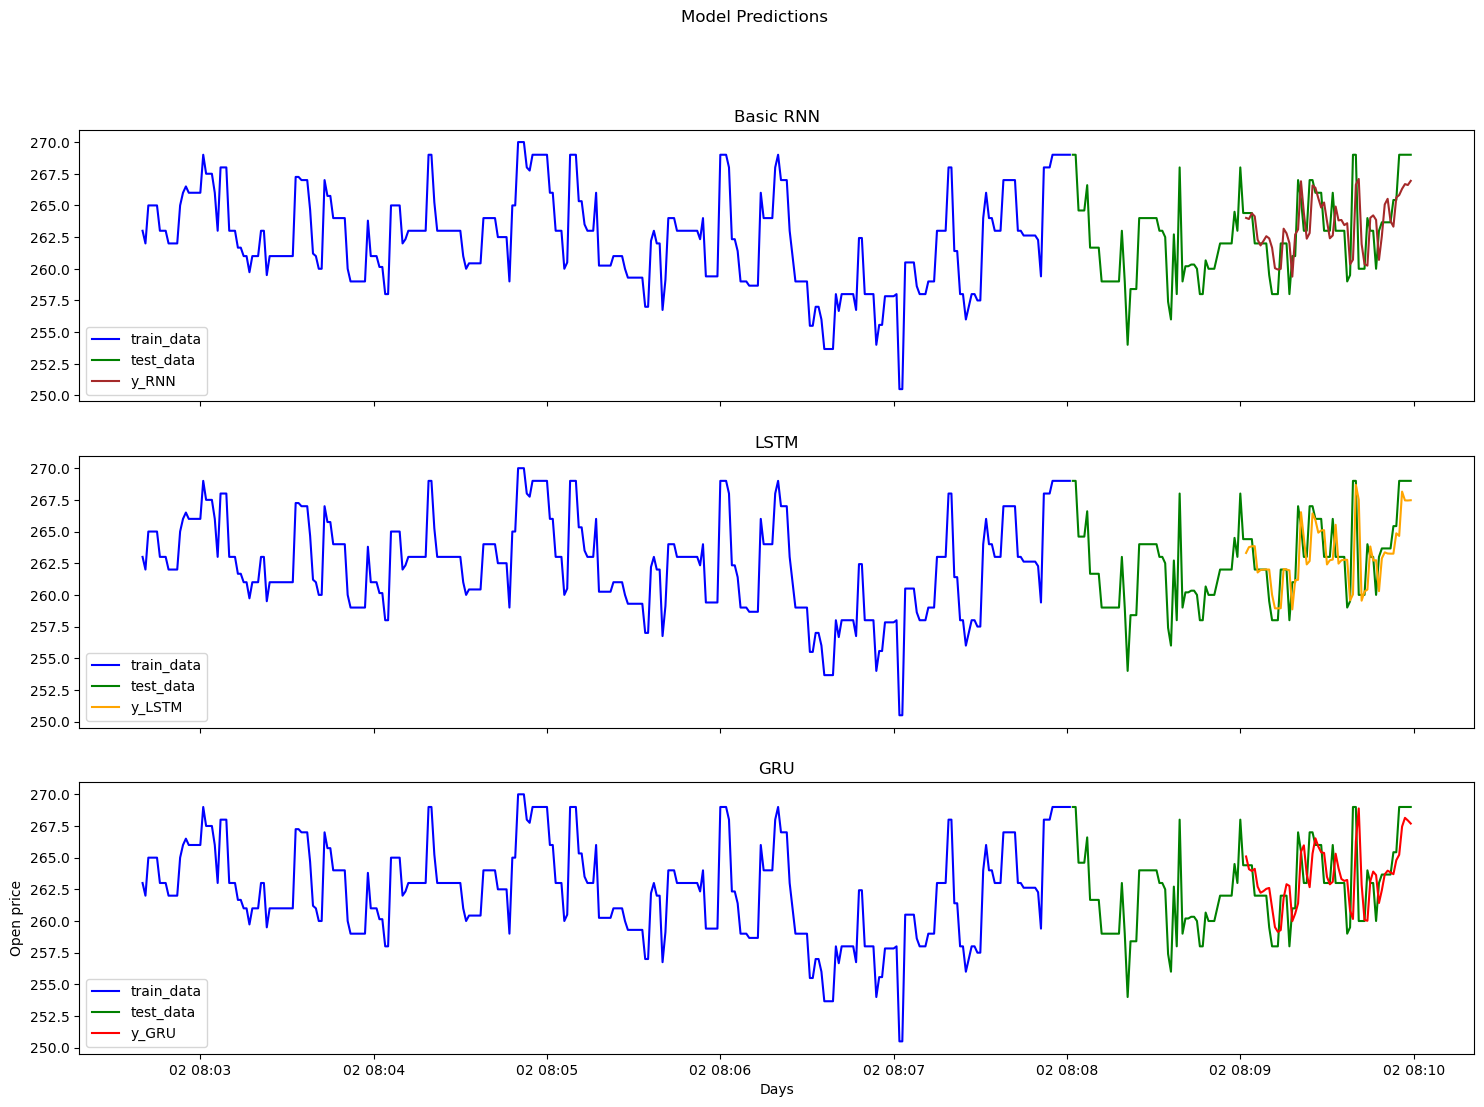

In [20]:
 
fig, axs = plt.subplots(3,figsize =(18,12),sharex=True, sharey=True)
fig.suptitle('Model Predictions')
 
#Plot for RNN predictions
axs[0].plot(train_data.index[150:], train_data["Last Tapes Price"][150:], label = "train_data", color = "b")
axs[0].plot(test_data.index, test_data["Last Tapes Price"], label = "test_data", color = "g")
axs[0].plot(test_data.index[window:], y_RNN_O, label = "y_RNN", color = "brown")
axs[0].legend()
axs[0].title.set_text("Basic RNN")
 
#Plot for LSTM predictions
axs[1].plot(train_data.index[150:], train_data["Last Tapes Price"][150:], label = "train_data", color = "b")
axs[1].plot(test_data.index, test_data["Last Tapes Price"], label = "test_data", color = "g")
axs[1].plot(test_data.index[window:], y_LSTM_O, label = "y_LSTM", color = "orange")
axs[1].legend()
axs[1].title.set_text("LSTM")
 
#Plot for GRU predictions
axs[2].plot(train_data.index[150:], train_data["Last Tapes Price"][150:], label = "train_data", color = "b")
axs[2].plot(test_data.index, test_data["Last Tapes Price"], label = "test_data", color = "g")
axs[2].plot(test_data.index[window:], y_GRU_O, label = "y_GRU", color = "red")
axs[2].legend()
axs[2].title.set_text("GRU")
 
plt.xlabel("Days")
plt.ylabel("Open price")
 
plt.show()

In [22]:
print("MAE for RNN : ",metrics.mean_absolute_error(test_data["Last Tapes Price"][window:], y_RNN_O))
print("MAE for LSTM : ",metrics.mean_absolute_error(test_data["Last Tapes Price"][window:], y_LSTM_O))
print("MAE for GRU : ",metrics.mean_absolute_error(test_data["Last Tapes Price"][window:], y_GRU_O))
print("RMSE for RNN : ",np.sqrt(metrics.mean_squared_error(test_data["Last Tapes Price"][window:], y_RNN_O)))
print("RMSE for LSTM : ",np.sqrt(metrics.mean_squared_error(test_data["Last Tapes Price"][window:], y_LSTM_O)))
print("RMSE for GRU : ",np.sqrt(metrics.mean_squared_error(test_data["Last Tapes Price"][window:], y_GRU_O)))

MAE for RNN :  1.863188083692527
MAE for LSTM :  1.5812361042292058
MAE for GRU :  1.7651448166820602
RMSE for RNN :  2.474650365374075
RMSE for LSTM :  2.4205336511851914
RMSE for GRU :  2.609624055517592


60 seconds predicting 5 ahead

In [49]:
window = 60
X_train = []
y_train = []
for i in range(window, len(scaled_train)-4):
    X_train.append(scaled_train[i-window:i, 0])
    y_train.append(scaled_train[i+4, 0])
    if i <= (window+1):
        print(X_train)
        print(y_train)
        print()

X_test = []
y_test = []
for i in range(window, len(scaled_test)-4):
    X_test.append(scaled_test[i-window:i, 0])
    y_test.append(scaled_test[i+4, 0])

 
# The data is converted to Numpy array
X_train, y_train = np.array(X_train), np.array(y_train)
 
#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))
print("X_train :",X_train.shape,"y_train :",y_train.shape)

# The data is converted to numpy array
X_test, y_test = np.array(X_test), np.array(y_test)
 
#Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))
print("X_test :",X_test.shape,"y_test :",y_test.shape)

[array([0.84615385, 0.88034188, 1.        , 0.84615385, 0.84615385,
       0.84615385, 0.84615385, 0.84615385, 0.74358974, 0.67521368,
       0.67521368, 0.69230769, 0.67032967, 0.67032967, 0.86324786,
       0.86324786, 0.57264957, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.64102564, 0.4974359 , 0.44615385, 0.44615385,
       0.44615385, 0.43589744, 0.43589744, 0.43589744, 0.33333333,
       0.33333333, 0.20512821, 0.36752137, 0.38461538, 0.38461538,
       0.79487179, 0.69230769, 0.65811966, 0.65811966, 0.64102564,
       0.64102564, 0.64102564, 0.64102564, 0.53846154, 0.53846154,
       0.43589744, 0.43589744, 0.43589744, 0.43589744, 0.43589744,
       0.48717949, 0.48717949, 0.48717949, 0.64102564, 0.64102564])]
[0.2820512820512828]

[array([0.84615385, 0.88034188, 1.        , 0.84615385, 0.84615385,
       0.84615385, 0.84615385, 0.84615385, 0.74358974, 0.67521368,
       0.67521368, 0.69230769, 0.670

In [50]:
#Initialising the model
regressorLSTM = Sequential()
 
#Adding LSTM layers
regressorLSTM.add(LSTM(window, 
                       return_sequences = True, 
                       input_shape = (X_train.shape[1],1)))
regressorLSTM.add(LSTM(window, 
                       return_sequences = False))
regressorLSTM.add(Dense(window/2))
 
#Adding the output layer
regressorLSTM.add(Dense(1))
 
#Compiling the model
regressorLSTM.compile(optimizer = 'adam',
                      loss = 'mean_squared_error',
                      metrics = ["accuracy"])
 
#Fitting the model
regressorLSTM.fit(X_train, 
                  y_train, 
                  batch_size = 1, 
                  epochs = 12)
regressorLSTM.summary()

Epoch 1/12
408/408 [==============================] - 26s 43ms/step - loss: 0.0428 - accuracy: 0.0123
Epoch 2/12
408/408 [==============================] - 18s 45ms/step - loss: 0.0371 - accuracy: 0.0074
Epoch 3/12
408/408 [==============================] - 17s 42ms/step - loss: 0.0384 - accuracy: 0.0123
Epoch 4/12
408/408 [==============================] - 14s 35ms/step - loss: 0.0375 - accuracy: 0.0049
Epoch 5/12
408/408 [==============================] - 15s 36ms/step - loss: 0.0368 - accuracy: 0.0123
Epoch 6/12
408/408 [==============================] - 14s 34ms/step - loss: 0.0367 - accuracy: 0.0074
Epoch 7/12
408/408 [==============================] - 14s 35ms/step - loss: 0.0354 - accuracy: 0.0098
Epoch 8/12
408/408 [==============================] - 14s 35ms/step - loss: 0.0369 - accuracy: 0.0074
Epoch 9/12
408/408 [==============================] - 14s 35ms/step - loss: 0.0363 - accuracy: 0.0074
Epoch 10/12
408/408 [==============================] - 14s 34ms/step - loss: 0.035

In [51]:
y_LSTM = regressorLSTM.predict(X_test)
y_LSTM_O = scaler.inverse_transform(y_LSTM) 

2/2 [==============================] - 2s 15ms/step


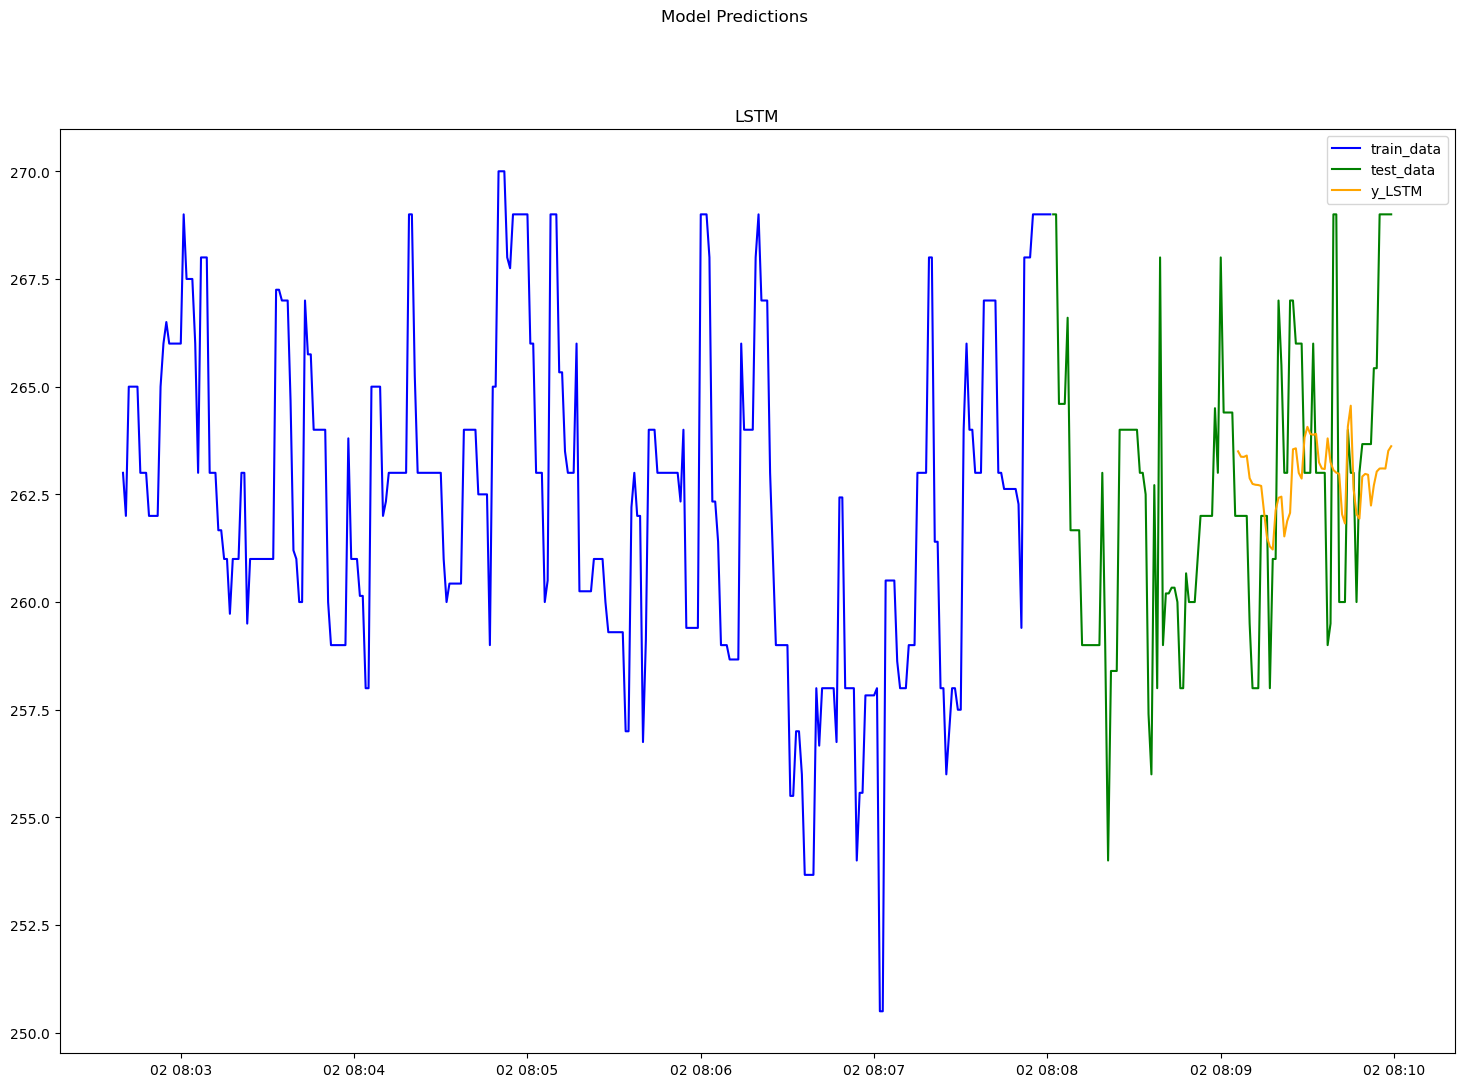

In [52]:
fig, axs = plt.subplots(1,figsize =(18,12),sharex=True, sharey=True)
fig.suptitle('Model Predictions')

#Plot for LSTM predictions
axs.plot(train_data.index[150:], train_data["Last Tapes Price"][150:], label = "train_data", color = "b")
axs.plot(test_data.index, test_data["Last Tapes Price"], label = "test_data", color = "g")
axs.plot((test_data.index[64:]), y_LSTM_O, label = "y_LSTM", color = "orange")
axs.legend()
axs.title.set_text("LSTM")

60 seconds predicting 10 ahead

In [32]:
window = 60
X_train = []
y_train = []
for i in range(window, len(scaled_train)-9):
    X_train.append(scaled_train[i-window:i, 0])
    y_train.append(scaled_train[i+9, 0])
    if i <= (window+1):
        print(X_train)
        print(y_train)
        print()

X_test = []
y_test = []
for i in range(window, len(scaled_test)-9):
    X_test.append(scaled_test[i-window:i, 0])
    y_test.append(scaled_test[i+9, 0])

 
# The data is converted to Numpy array
X_train, y_train = np.array(X_train), np.array(y_train)
 
#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))
print("X_train :",X_train.shape,"y_train :",y_train.shape)

# The data is converted to numpy array
X_test, y_test = np.array(X_test), np.array(y_test)
 
#Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))
print("X_test :",X_test.shape,"y_test :",y_test.shape)

[array([0.84615385, 0.88034188, 1.        , 0.84615385, 0.84615385,
       0.84615385, 0.84615385, 0.84615385, 0.74358974, 0.67521368,
       0.67521368, 0.69230769, 0.67032967, 0.67032967, 0.86324786,
       0.86324786, 0.57264957, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.64102564, 0.4974359 , 0.44615385, 0.44615385,
       0.44615385, 0.43589744, 0.43589744, 0.43589744, 0.33333333,
       0.33333333, 0.20512821, 0.36752137, 0.38461538, 0.38461538,
       0.79487179, 0.69230769, 0.65811966, 0.65811966, 0.64102564,
       0.64102564, 0.64102564, 0.64102564, 0.53846154, 0.53846154,
       0.43589744, 0.43589744, 0.43589744, 0.43589744, 0.43589744,
       0.48717949, 0.48717949, 0.48717949, 0.64102564, 0.64102564])]
[0.6410256410256423]

[array([0.84615385, 0.88034188, 1.        , 0.84615385, 0.84615385,
       0.84615385, 0.84615385, 0.84615385, 0.74358974, 0.67521368,
       0.67521368, 0.69230769, 0.670

In [33]:
#Initialising the model
regressorLSTM = Sequential()
 
#Adding LSTM layers
regressorLSTM.add(LSTM(window, 
                       return_sequences = True, 
                       input_shape = (X_train.shape[1],1)))
regressorLSTM.add(LSTM(window, 
                       return_sequences = False))
regressorLSTM.add(Dense(window/2))
 
#Adding the output layer
regressorLSTM.add(Dense(1))
 
#Compiling the model
regressorLSTM.compile(optimizer = 'adam',
                      loss = 'mean_squared_error',
                      metrics = ["accuracy"])
 
#Fitting the model
regressorLSTM.fit(X_train, 
                  y_train, 
                  batch_size = 1, 
                  epochs = 12)
regressorLSTM.summary()

Epoch 1/12
403/403 [==============================] - 20s 35ms/step - loss: 0.0465 - accuracy: 0.0074
Epoch 2/12
403/403 [==============================] - 15s 37ms/step - loss: 0.0399 - accuracy: 0.0099
Epoch 3/12
403/403 [==============================] - 15s 38ms/step - loss: 0.0401 - accuracy: 0.0074
Epoch 4/12
403/403 [==============================] - 20s 49ms/step - loss: 0.0382 - accuracy: 0.0099
Epoch 5/12
403/403 [==============================] - 16s 40ms/step - loss: 0.0384 - accuracy: 0.0074
Epoch 6/12
403/403 [==============================] - 12s 29ms/step - loss: 0.0386 - accuracy: 0.0074
Epoch 7/12
403/403 [==============================] - 8s 21ms/step - loss: 0.0379 - accuracy: 0.0074
Epoch 8/12
403/403 [==============================] - 8s 19ms/step - loss: 0.0389 - accuracy: 0.0074
Epoch 9/12
403/403 [==============================] - 8s 19ms/step - loss: 0.0385 - accuracy: 0.0074
Epoch 10/12
403/403 [==============================] - 9s 23ms/step - loss: 0.0385 - 

In [39]:
y_LSTM = regressorLSTM.predict(X_test)
y_LSTM_O = scaler.inverse_transform(y_LSTM) 

2/2 [==============================] - 2s 23ms/step


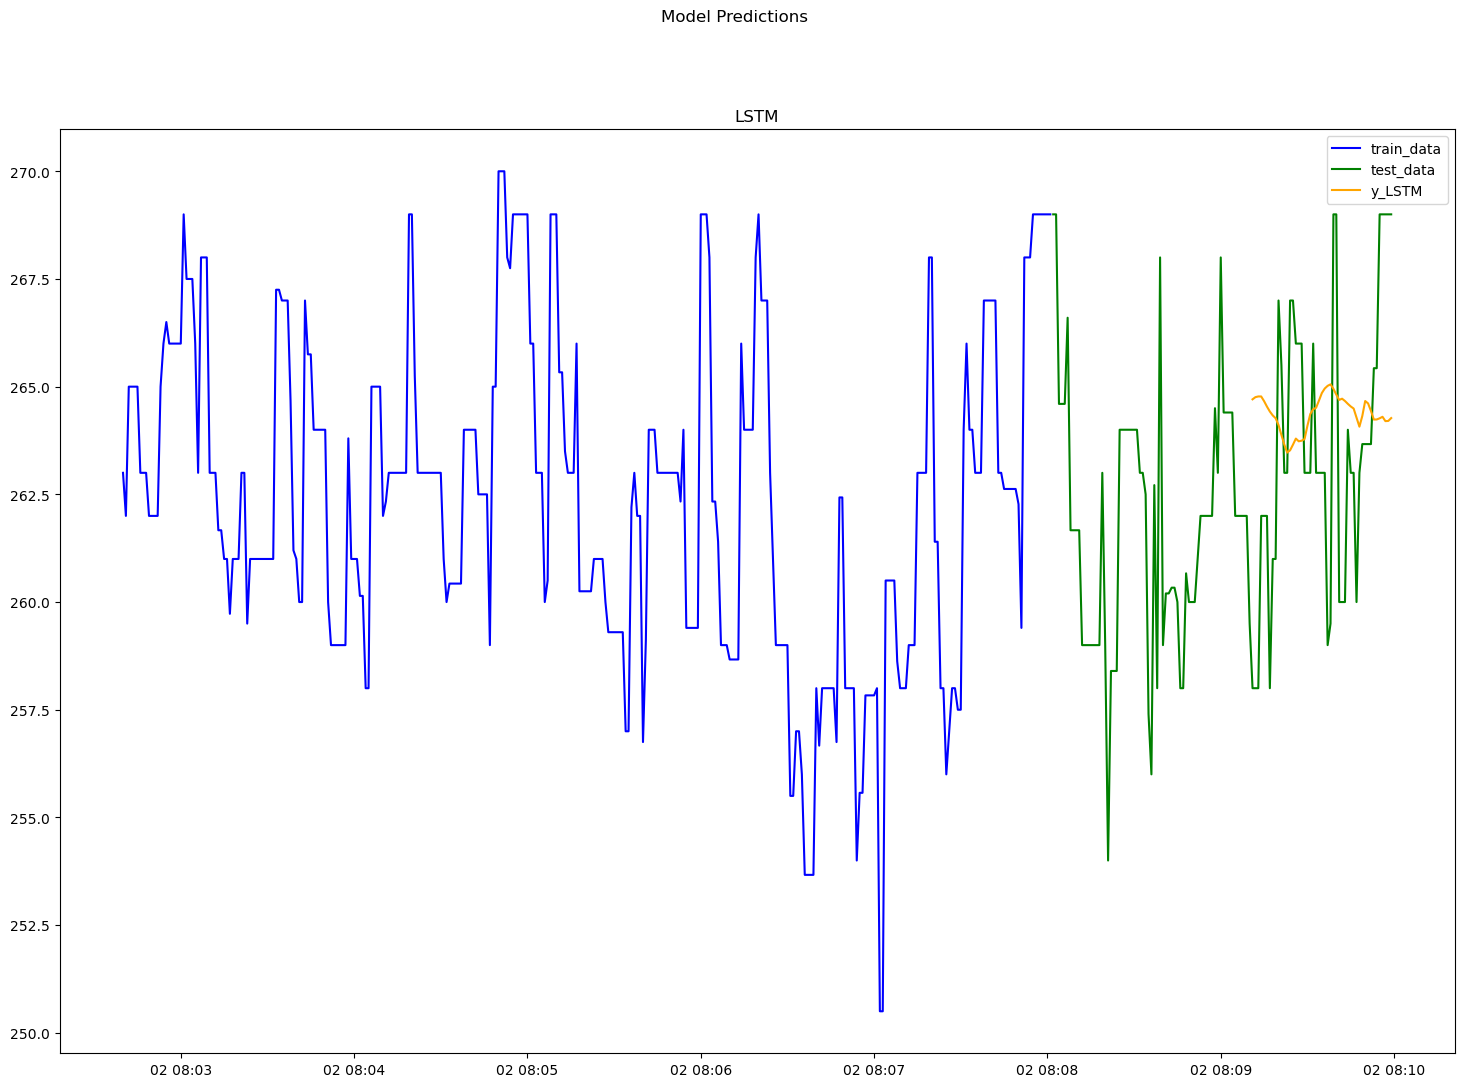

In [44]:
fig, axs = plt.subplots(1,figsize =(18,12),sharex=True, sharey=True)
fig.suptitle('Model Predictions')

#Plot for LSTM predictions
axs.plot(train_data.index[150:], train_data["Last Tapes Price"][150:], label = "train_data", color = "b")
axs.plot(test_data.index, test_data["Last Tapes Price"], label = "test_data", color = "g")
axs.plot((test_data.index[69:]), y_LSTM_O, label = "y_LSTM", color = "orange")
axs.legend()
axs.title.set_text("LSTM")

60 seconds predicting 20 secs ahead

In [45]:
window = 60
X_train = []
y_train = []
for i in range(window, len(scaled_train)-19):
    X_train.append(scaled_train[i-window:i, 0])
    y_train.append(scaled_train[i+19, 0])
    if i <= (window+1):
        print(X_train)
        print(y_train)
        print()

X_test = []
y_test = []
for i in range(window, len(scaled_test)-19):
    X_test.append(scaled_test[i-window:i, 0])
    y_test.append(scaled_test[i+19, 0])

 
# The data is converted to Numpy array
X_train, y_train = np.array(X_train), np.array(y_train)
 
#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))
print("X_train :",X_train.shape,"y_train :",y_train.shape)

# The data is converted to numpy array
X_test, y_test = np.array(X_test), np.array(y_test)
 
#Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))
print("X_test :",X_test.shape,"y_test :",y_test.shape)

[array([0.84615385, 0.88034188, 1.        , 0.84615385, 0.84615385,
       0.84615385, 0.84615385, 0.84615385, 0.74358974, 0.67521368,
       0.67521368, 0.69230769, 0.67032967, 0.67032967, 0.86324786,
       0.86324786, 0.57264957, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.64102564, 0.4974359 , 0.44615385, 0.44615385,
       0.44615385, 0.43589744, 0.43589744, 0.43589744, 0.33333333,
       0.33333333, 0.20512821, 0.36752137, 0.38461538, 0.38461538,
       0.79487179, 0.69230769, 0.65811966, 0.65811966, 0.64102564,
       0.64102564, 0.64102564, 0.64102564, 0.53846154, 0.53846154,
       0.43589744, 0.43589744, 0.43589744, 0.43589744, 0.43589744,
       0.48717949, 0.48717949, 0.48717949, 0.64102564, 0.64102564])]
[0.4871794871794872]

[array([0.84615385, 0.88034188, 1.        , 0.84615385, 0.84615385,
       0.84615385, 0.84615385, 0.84615385, 0.74358974, 0.67521368,
       0.67521368, 0.69230769, 0.670

In [46]:
#Initialising the model
regressorLSTM = Sequential()
 
#Adding LSTM layers
regressorLSTM.add(LSTM(window, 
                       return_sequences = True, 
                       input_shape = (X_train.shape[1],1)))
regressorLSTM.add(LSTM(window, 
                       return_sequences = False))
regressorLSTM.add(Dense(window/2))
 
#Adding the output layer
regressorLSTM.add(Dense(1))
 
#Compiling the model
regressorLSTM.compile(optimizer = 'adam',
                      loss = 'mean_squared_error',
                      metrics = ["accuracy"])
 
#Fitting the model
regressorLSTM.fit(X_train, 
                  y_train, 
                  batch_size = 1, 
                  epochs = 12)
regressorLSTM.summary()

Epoch 1/12
393/393 [==============================] - 31s 47ms/step - loss: 0.0496 - accuracy: 0.0127
Epoch 2/12
393/393 [==============================] - 15s 37ms/step - loss: 0.0417 - accuracy: 0.0076
Epoch 3/12
393/393 [==============================] - 13s 33ms/step - loss: 0.0409 - accuracy: 0.0076
Epoch 4/12
393/393 [==============================] - 15s 39ms/step - loss: 0.0405 - accuracy: 0.0076
Epoch 5/12
393/393 [==============================] - 17s 43ms/step - loss: 0.0383 - accuracy: 0.0076
Epoch 6/12
393/393 [==============================] - 15s 38ms/step - loss: 0.0413 - accuracy: 0.0076
Epoch 7/12
393/393 [==============================] - 14s 34ms/step - loss: 0.0397 - accuracy: 0.0076
Epoch 8/12
393/393 [==============================] - 14s 35ms/step - loss: 0.0401 - accuracy: 0.0076
Epoch 9/12
393/393 [==============================] - 13s 34ms/step - loss: 0.0397 - accuracy: 0.0076
Epoch 10/12
393/393 [==============================] - 13s 34ms/step - loss: 0.039

In [47]:
y_LSTM = regressorLSTM.predict(X_test)
y_LSTM_O = scaler.inverse_transform(y_LSTM) 

2/2 [==============================] - 2s 43ms/step


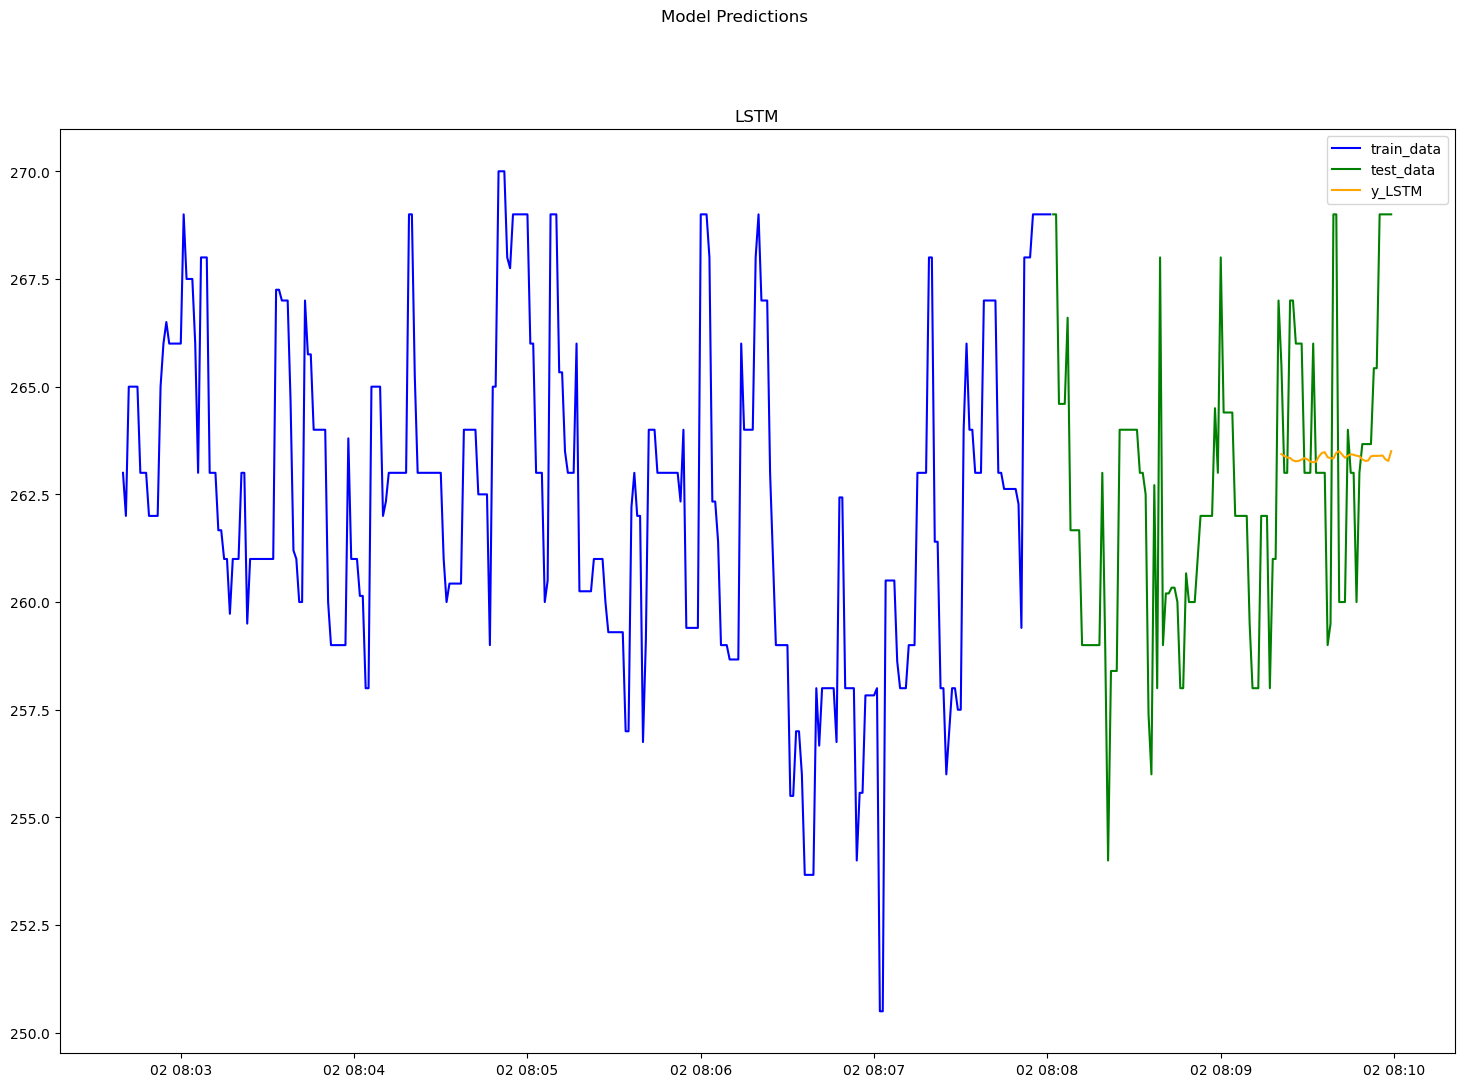

In [48]:
fig, axs = plt.subplots(1,figsize =(18,12),sharex=True, sharey=True)
fig.suptitle('Model Predictions')

#Plot for LSTM predictions
axs.plot(train_data.index[150:], train_data["Last Tapes Price"][150:], label = "train_data", color = "b")
axs.plot(test_data.index, test_data["Last Tapes Price"], label = "test_data", color = "g")
axs.plot((test_data.index[79:]), y_LSTM_O, label = "y_LSTM", color = "orange")
axs.legend()
axs.title.set_text("LSTM")